You will be working with basic Word2Vec Problems.
Step 1: Load the Wikipedia GLoVE Word2Vec.
Step 2: Show how similar are these words:
                 Man and Woman
                 Chair and Throne
                 water and baby
Step 3: Using these provide analogies for the following:
             _____ is to King as Woman is to Man.
             _____ is to Princess as Man is to Woman.
             _____ is to a woman as a child is to an adult.

Step 4: Apply Naive-Bayes Classifier on the Spam-Ham dataset shown in the demo.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/My Drive/Data 255 Spring 2024/Google Colab/Homework7'

/content/drive/My Drive/Data 255 Spring 2024/Google Colab/Homework7


### Step 1: Load the Wikipedia GLoVE Word2Vec.

In [3]:
# GloVE is a pretrained model on Wikipedia and Gigaword(dataset compiled with news articles etc)
# with 200 dimensional vectors

import gensim
from gensim.models import Word2Vec

import gensim.downloader as api

In [4]:
glove_model = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


### Step 2: Show how similar are these words: Man and Woman Chair and Throne water and baby

In [5]:
# The words need to be lower case otherwise the model fails to work

print("Cosine similarity between 'Man' and 'Woman' : ", glove_model.similarity('man', 'woman'))
print("Cosime similarity between 'Chair' and 'Throne' : ", glove_model.similarity('chair', 'throne'))
print("Cosine similarity between 'Water' and 'Baby' : ", glove_model.similarity('water', 'baby'))

Cosine similarity between 'Man' and 'Woman' :  0.75200856
Cosime similarity between 'Chair' and 'Throne' :  0.24691008
Cosine similarity between 'Water' and 'Baby' :  0.35296535


### Step 3: Using these provide analogies for the following: _ is to King as Woman is to Man. _ is to Princess as Man is to Woman. _____ is to a woman as a child is to an adult.

In [6]:
#glove_model

#find the analogy in the following
result1 = glove_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
result2 = glove_model.most_similar(positive=['man', 'princess'], negative=['woman'], topn=1)
result3 = glove_model.most_similar(positive=['child', 'woman'], negative=['adult'], topn=1)

#Print the result
print(result1, 'is to King as Woman is to Man')
print(result2, 'is to Princess as Man is to Woman')
print(result1, 'is to woman as child is to an adult')

[('queen', 0.6978678107261658)] is to King as Woman is to Man
[('prince', 0.6813269853591919)] is to Princess as Man is to Woman
[('queen', 0.6978678107261658)] is to woman as child is to an adult


### Step 4: Apply Naive-Bayes Classifier on the Spam-Ham dataset shown in the demo.

In [9]:
#!pip install scikit-plot

In [10]:
# Import necessary libraries
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#from scipy.sparse import csr_matrix
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
#from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Creating emoticon list

In [11]:
emotions_list = [":)", ":(", ":p", ":D", "-_-", ":o"]

### Filtering SMS based on character length

In [12]:
def char_flag(l):
    if l <= 40:
        return 1
    elif l <= 60:
        return 2
    elif l <= 80:
        return 3
    elif l <= 120:
        return 4
    elif l <= 160:
        return 5
    else:
        return 6

In [13]:
### Removing stop words

In [14]:
stop_words = []
def text_process(mess):
    no_punct = re.sub('[^A-Za-z ]+', '', mess.lower())
    return np.array([stemmer.stem(word) for word in no_punct.split() if word not in stop_words])

### Data preprocessing

In [15]:
def preprocessing_text():
    for d, ln in zip(messages_data, token_4):
        token_1.append(d)
        token_2.append(d.count('$'))
        x =re.sub('[^0-9 ]+', '', d.lower())
        token_3.append(len(x))
        token_5.append(char_flag(ln))
        if (re.sub(r'[^://@]', '', d.lower())) is not '':
            token_6.append(1)
        else:
            token_6.append(0)
        token_7.append(len(x.split()))
        for emoji in emotions_list:
            if(re.search(re.escape(emoji), d)):
                token_8.append(1)
            else:
                token_8.append(0)
    return np.array(
        [np.array([token_1[i], token_2[i], token_3[i], token_4[i], token_5[i], token_6[i],
                   token_7[i],token_8[i]], dtype=object) for i in
         range(len(messages_data))])

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-15-3b9ebe6f7829>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if (re.sub(r'[^://@]', '', d.lower())) is not '':


### Data conversion to vector form

In [16]:
def data_mapper():
    data = preprocessing_text()
    labels = ['message','f1','f2','f3','f4','f5','f6','f7']
    df = pd.DataFrame.from_records(data,columns=labels)
    mapper = DataFrameMapper([
    (['f1', 'f2','f3','f4','f5','f6','f7'], None),
    ('message',CountVectorizer(analyzer = text_process,ngram_range=(2, 2)))])
    X=mapper.fit_transform(df)
    return X

### Main function

In [17]:
if __name__ == "__main__":

    messages = pd.read_csv("spam.csv", encoding='latin-1')
    print(messages)
    messages = messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
    print(messages)


        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [18]:
messages['length'] = messages['v2'].apply(len)
messages_data = messages['v2']
messages_labels = messages['v1']
print(messages)

        v1                                                 v2  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     161
5568   ham              Will Ì_ b going to esplanade fr home?      37
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]


In [19]:
token_1 = []
token_2 = []
token_3 = []
token_4 = messages['length']
token_5 = []
token_6 = []
token_7 = []
token_8 = []

freq = pd.Series(' '.join(messages_data).split()).value_counts()
print(freq)

to           2134
you          1622
I            1466
a            1327
the          1197
             ... 
AOM             1
Box61,M60       1
1ER             1
Ages            1
Rofl.           1
Length: 15585, dtype: int64


In [20]:
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(freq[-9268:].index)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
mapped_data = data_mapper()

trainset, testset, trainlabel, testlabel = train_test_split(mapped_data, messages_labels, test_size=0.33, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


### Naive Bayes

confusion_matrix:  [[1341  246]
 [  31  221]]


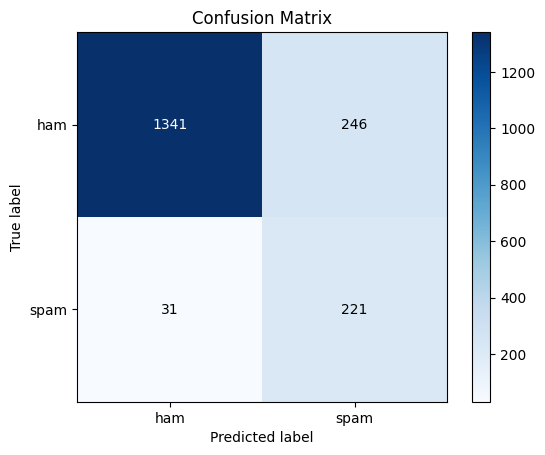

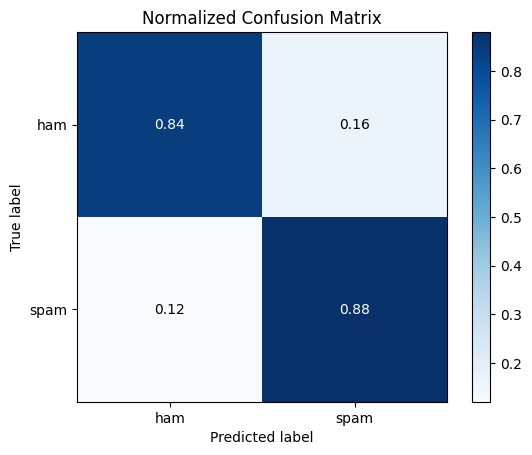

In [22]:
nb = GaussianNB()
nb.fit(trainset, trainlabel)
predicted_values = nb.predict(testset) #predict the test labels

#Accuracy
accuracy = accuracy_score(testlabel, predicted_values)

#10 fold cross validation
clf = GaussianNB()
scores = cross_val_score(clf, trainset, trainlabel, cv=10)

#confusion matrix
confusion_matrix = confusion_matrix(testlabel,predicted_values,labels=["ham","spam"] )
skplt.metrics.plot_confusion_matrix(testlabel,predicted_values, normalize=False)
skplt.metrics.plot_confusion_matrix(testlabel,predicted_values, normalize=True)

print('confusion_matrix: ', confusion_matrix)
plt.show()

In [23]:
print("Accuracy using Naive Bayes: ", accuracy)
print ('\n')
print('Validation scores: ', scores)

Accuracy using Naive Bayes:  0.8493746601413812


Validation scores:  [0.84224599 0.84491979 0.85828877 0.87399464 0.88739946 0.87131367
 0.85522788 0.87399464 0.84182306 0.8310992 ]
